# ****Project Definition****

**Description:** The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# **Importing Necessary Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# **EDA (EXPLORATORY DATA ANALYSIS)**
In this section, we will load the dataset into our environment and perform exploratory data analysis (EDA) to better understand its structure and characteristics.
*Exploratory Data Analysis* (EDA) is a crucial step in the machine learning workflow, allowing you to understand your data before applying any models. Here's a breakdown of what EDA involves and some common techniques:
* Data Collection
* Data Inspection
* Bivariate Analysis
* Multivariate Analysis
* Missing Values

***Purpose of EDA:***
* **Understanding Data Structure:** Get a sense of the dataset's dimensions, types, and any missing values.
* **Detecting Patterns and Trends:** Identify relationships, trends, or anomalies within the data.
* **Generating Hypotheses:** Formulate questions or hypotheses based on observed patterns.

**Tools used:**
`pandas`, `matplotlib`, `seaborn`, `numpy`, `scipy`

## Loading Dataset

 importing or reading data into your system or environment from various data sources for further processing and analysis. This is a crucial first step in any data science, machine learning, or data analytics workflow, as it allows you to work with raw data in a structured format.

### Files Used
**train.csv** - the training set

**test.csv** - the test set

In [2]:
train = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
sample_submission = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv')

## Data Inspection
Understanding data is about thoroughly exploring the dataset, cleaning it, and performing statistical and visual analysis to derive meaningful insights. This is essential for making data-driven decisions, such as refining marketing strategies or predicting future outcomes.

In [3]:
train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

The train dataset contains 39,211 records with 15 columns, including both numerical and categorical data.

**Key points:**

**Missing Data:** Columns like Job, Education, Contact, and Poutcome have missing values, with Poutcome having a large proportion of missing entries (~75%).

**Numerical Columns:** Includes Age, Balance, Duration, and others, with no missing values. These could be useful in predicting the target variable.

**Categorical Columns:** Includes Job, Marital, Education, Contact, Poutcome, and Target. Target is likely the key variable, indicating success or failure in a campaign.

In [5]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


*The summary statistics for the numerical features indicate the following insights:*

**Age:** The dataset has an average age of approximately 42 years, with a range from 18 to 95 years. The standard deviation of about 12.7 years suggests some variability among ages.

**Balance:** The average account balance is around 5,442, but the minimum balance is negative, indicating overdrafts. The balance values show significant variability, as evidenced by a high standard deviation of 16,365.

**Duration:** The average duration of calls is about 439 seconds, with a minimum of 0 seconds, indicating that some calls may not have occurred. The maximum duration is significantly higher, at nearly 4,918 seconds.

**Campaign:** On average, individuals were contacted during about 5 campaigns, with the maximum being 63, indicating some individuals were contacted multiple times.

**Pdays:** This feature represents the number of days since the last contact, with a mean of approximately 72 days. Notably, -1 values indicate that individuals have never been contacted.

**Previous:** The average number of previous contacts is about 12, with a maximum of 275, suggesting that some individuals have been contacted frequently in the past.

In [6]:
train.duplicated().sum()

0

## **Visualizations**

Data visualization is the process of representing data in a graphical format to better understand patterns, trends, relationships, and distributions. Visualizing data allows you to derive insights and communicate findings effectively. 


* Good visuals help in capturing the attention of the audience, and they can understand stuff better.
* Makes data exploration more accessible and easy.
* Data insights and visuals can be shared easily.
* Understand the information more easily.
* Gain better insights.
* Make swift data-driven decisions.

**Tools Used:**
`matplotlib`, `plotly`, `seaborn`

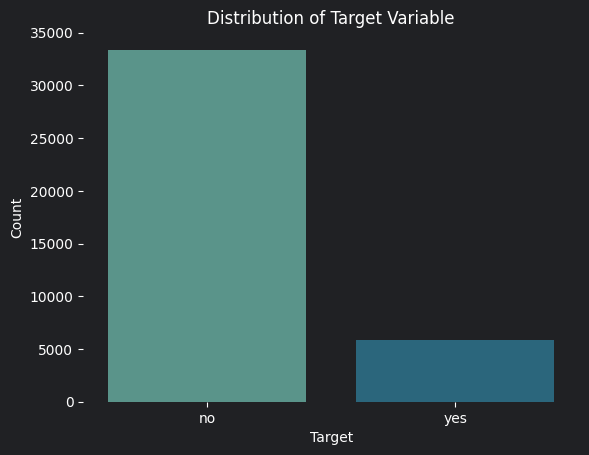

In [7]:
ax=sns.countplot(x='target', data=train, palette='crest')
ax.set_facecolor('#202124')
plt.gcf().set_facecolor('#202124')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_xlabel("Target", color='white')
ax.set_ylabel("Count", color='white')
for spine in ax.spines.values():
    spine.set_visible(False)
plt.title("Distribution of Target Variable", color='white')
plt.show()

The plot shows the distribution of a target variable, a binary classification problem (subscription or non-subscription).

**Here are some key observations:**

* ***Class Imbalance:*** The distribution is heavily skewed towards the "no" category, with significantly fewer instances in the "yes" category. This indicates a class imbalance, which can impact model performance and require careful handling during training.
* ***Majority Class:*** The "no" class is the majority class, making up a much larger portion of the dataset.
* ***Minority Class:*** The "yes" class is the minority class, with a much smaller representation.

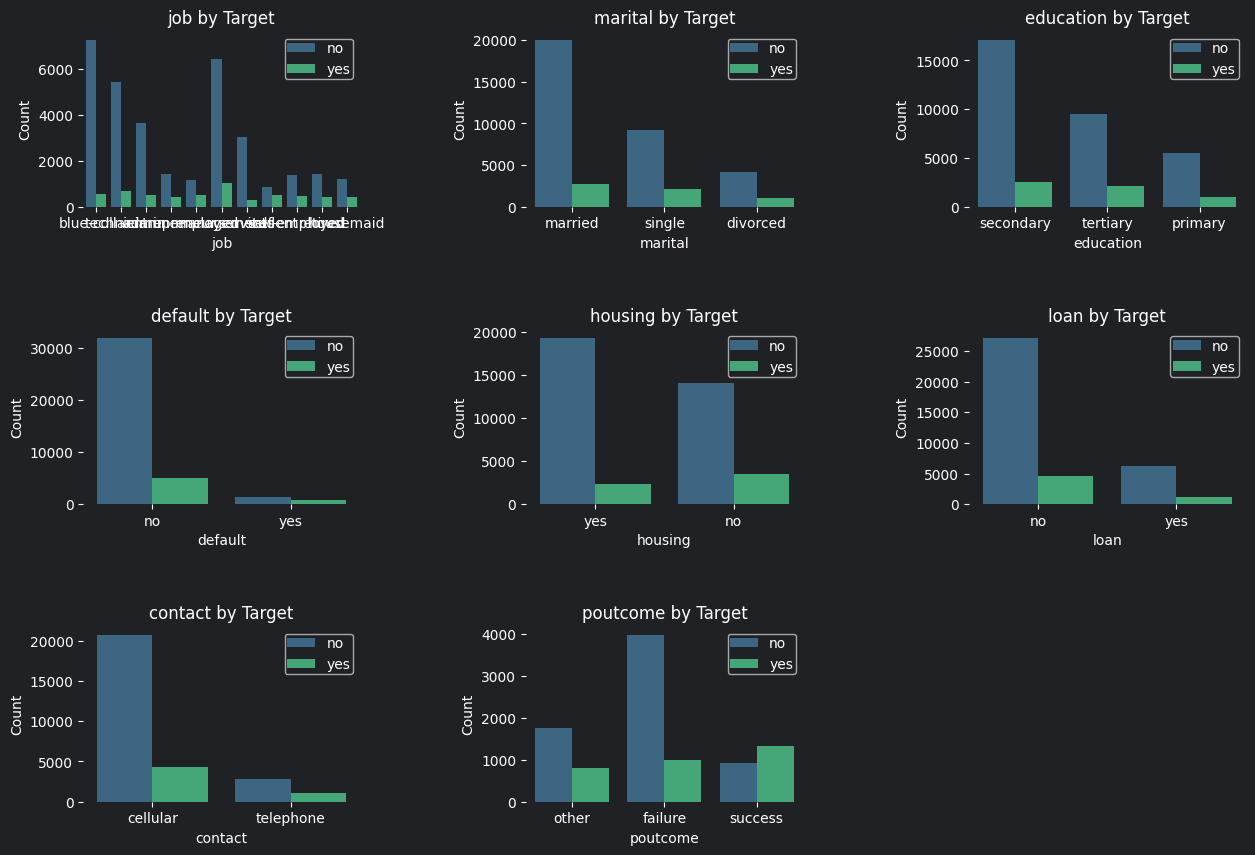

In [8]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

plt.figure(figsize=(15, 10))
plt.gcf().patch.set_facecolor('#202124')
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    plt.gca().set_facecolor('#202124')
    ax=sns.countplot(data=train, x=feature, hue='target', palette='viridis')
    ax.set_facecolor('#202124')
    plt.title(f'{feature} by Target', color='white')
    plt.xlabel(feature, color='white')
    plt.ylabel('Count', color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    plt.subplots_adjust(hspace=0.7, wspace=0.6)
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.legend(borderpad=0.2, facecolor='#202124', labelcolor='white')

* Certain job categories, marital statuses, and educational levels may be more associated with subscription or non-subscription. 
* Having a default on a loan is strongly associated with non-subscription, while the effects of housing and loan on the target variable are less pronounced.
* The contact method and previous outcome can be influential factors on subscription or non-subscription. Specifically, the "success" previous outcome appears to be strongly associated with subscription, while the "unknown" previous outcome has a more balanced distribution. 

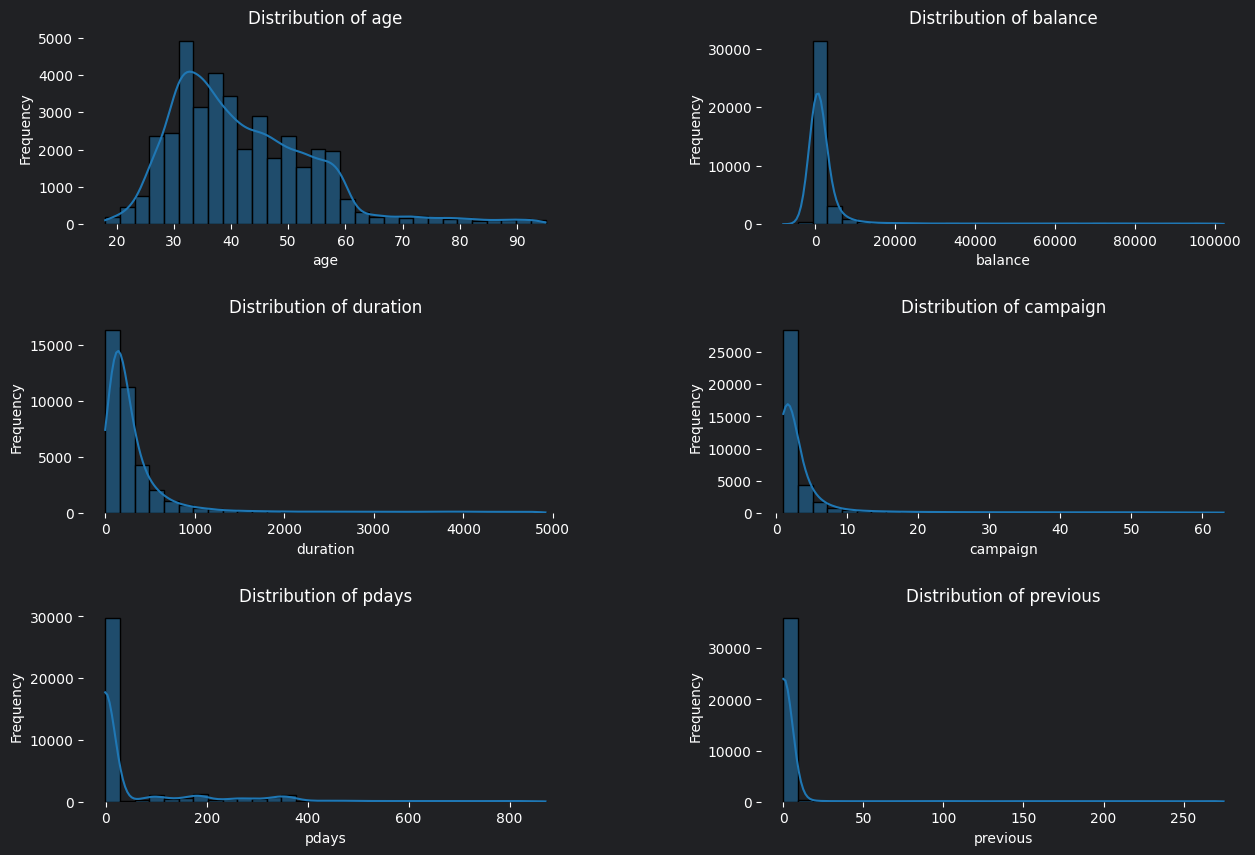

In [9]:
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15, 10))
plt.gcf().patch.set_facecolor('#202124')
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    ax=sns.histplot(train[feature], bins=30, kde=True, palette='viridis')
    ax.set_facecolor('#202124')
    plt.title(f'Distribution of {feature}', color='white')
    plt.xlabel(feature, color='white')
    plt.ylabel('Frequency', color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    for spine in ax.spines.values():
        spine.set_visible(False)


**Key Observations:**
* **Age:** Right-skewed distribution with a peak around 30-35 years, indicating a predominance of younger individuals.
* **Balance:** Heavily right-skewed, most individuals have low balances, peaking around 0.
* **Duration:** Highly right-skewed, indicating most calls are short, with a peak around 0.
* **Campaign:** Right-skewed, with most individuals contacted once, peaking at 0.
* **Pdays:** Heavily right-skewed, with many individuals uncontacted (pdays=999) and specific peaks indicating patterns in contact attempts.
* **Previous:** Right-skewed, most individuals contacted once or not at all (previous=0), peaking at 0.

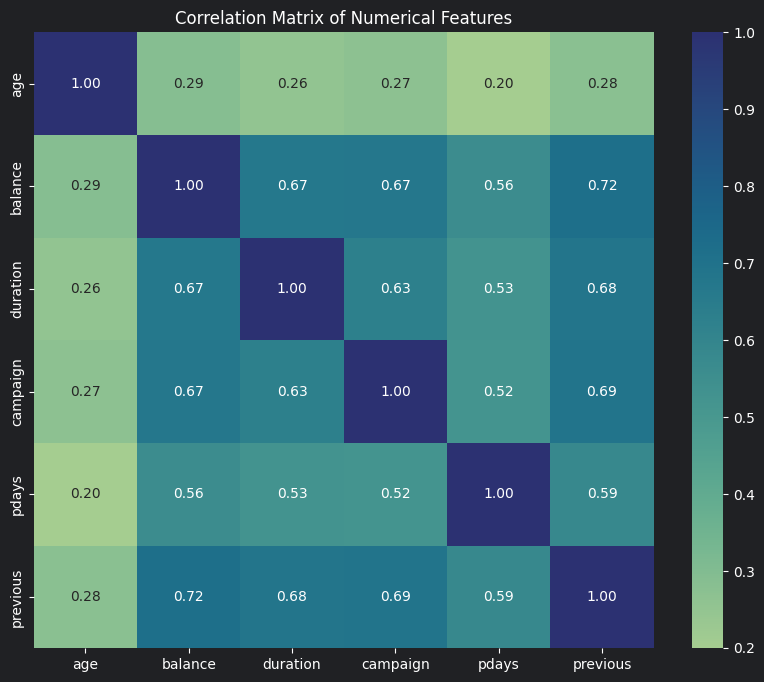

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = train[numerical_features].corr()
ax=sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', color='white')
plt.gcf().patch.set_facecolor('#202124')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_tick_params(color='white')  # Change color bar ticks to white
colorbar.ax.set_yticklabels(colorbar.ax.get_yticklabels(), color='white')
plt.show()

**Correlation Matrix Insights:**

**Positive Correlations:**

* Duration & Campaign: Strong link; longer calls relate to more contact attempts.
* Balance & Previous: Moderate link; higher balances often mean more past contacts.

**Negative Correlations:**

* Pdays & Previous: Strong inverse relationship; more past contacts result in lower pdays.

**Weak Correlations:**

* Age: Generally weak correlations with other features, indicating limited relationships.
  


**Interpreting the Heatmap:**

Bright colors (yellow/green): High positive correlation (values close to +1).


Dark colors (blue/purple): High negative correlation (values close to -1).


Light colors: Low or no correlation (values close to 0).


Diagonal: Always 1 since each feature is perfectly correlated with itself.

# DATA PREPROCESSING

Data preprocessing is the task of cleaning and transforming raw data to make it suitable for analysis and modeling. Preprocessing steps include data cleaning, data normalization, and data transformation. The goal of data preprocessing is to improve both the accuracy and efficiency of downstream analysis and modeling.

**Tools Used:** 
`StandardScaler()`, `OneHotEncoder()`, `SimpleImputer()`, `ColumnTransformer()`, `OrdinalEncoder()`

Steps Included in Data Preprocessing:
* Data Cleaning
* Data Standardization
* Categorical Encoding
* Feature Scaling
* Transformation

## Data Imputation
Data imputation is the process of filling in missing or incomplete values in a dataset. It's used to ensure that the dataset is complete and ready for analysis or machine learning. Imputation helps prevent data loss and allows algorithms to work with complete datasets. However, it's important to choose the right imputation method to avoid introducing bias.

In [11]:
# # Impute missing values for 'job' and 'education' with the most frequent category (mode)
# train['job'] = train['job'].fillna(train['job'].mode()[0])
# train['education'] = train['education'].fillna(train['education'].mode()[0])
# # Impute missing values for 'contact' and 'poutcome' with 'unknown'
# train['contact'] = train['contact'].fillna('unknown')
# train['poutcome'] = train['poutcome'].fillna('unknown')


In [12]:
# Define the ColumnTransformer with SimpleImputer for both 'most_frequent' and 'constant' strategies
imputeTransformer = ColumnTransformer([
    ('SI_mostfrequent', SimpleImputer(strategy='most_frequent'), ['job', 'education']),
    ('SI_unknown_values', SimpleImputer(strategy='constant', fill_value='unknown'), ['contact', 'poutcome'])
], remainder='passthrough', verbose_feature_names_out=False)

transformed_features = imputeTransformer.fit_transform(train)

columns = imputeTransformer.get_feature_names_out()
train = pd.DataFrame(transformed_features, columns=columns)

The code uses a **ColumnTransformer** with **SimpleImputer** to handle missing values in specific columns of the `train` dataset:

- **'job'** and **'education'** columns: Missing values are replaced with the most frequent value.
- **'contact'** and **'poutcome'** columns: Missing values are replaced with `'unknown'`.
- Other columns are left unchanged (`remainer='pasough'`)ugh'


The `fit_transform()` method is then applied to the train dataset to impute the missing values, and the resulting data is converted back into a DataFrame with updated column names using `get_feature_names_out()`. This produces the transformed dataset with imputed values for missing entrmes.

In [13]:
train.isnull().sum()

job                  0
education            0
contact              0
poutcome             0
last contact date    0
age                  0
marital              0
default              0
balance              0
housing              0
loan                 0
duration             0
campaign             0
pdays                0
previous             0
target               0
dtype: int64

##  Feature Engineering

Feature engineering is the process of selecting and transforming variables from raw data to create features for machine learning models. The goal is to improve the model's accuracy and performance by creating a precise set of features.  

In [14]:
# Convert 'last contact date' to datetime format
train['last contact date'] = pd.to_datetime(train['last contact date'])
test['last contact date'] = pd.to_datetime(test['last contact date'])

# Extract year, month, day, and weekday from the date
train['contact_year'] = train['last contact date'].dt.year
train['contact_month'] = train['last contact date'].dt.month
train['contact_day'] = train['last contact date'].dt.day
train['contact_weekday'] = train['last contact date'].dt.weekday

test['contact_year'] = test['last contact date'].dt.year
test['contact_month'] = test['last contact date'].dt.month
test['contact_day'] = test['last contact date'].dt.day
test['contact_weekday'] = test['last contact date'].dt.weekday

Transforming the raw `last contact date` column into multiple new features 

**Why It's Important:**
* ***Time-based Features:*** The extracted year, month, day, and weekday can be important because:
Some models may benefit from knowing if a contact was made during a particular month (e.g., seasonal trends).
The day of the week may also affect outcomes (e.g., if customers are more likely to respond on weekdays).
* ***Machine Learning Models:*** Many machine learning algorithms cannot work directly with datetime values, so we convert these into numerical or categorical features (like year, month, weekday) that can be input into models.

In [15]:
# Map weekdays and months to string names
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
               4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 
             5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 
             10: 'October', 11: 'November', 12: 'December'}

train['contact_weekday'] = train['contact_weekday'].map(weekday_map)
train['contact_month'] = train['contact_month'].map(month_map)

test['contact_weekday'] = test['contact_weekday'].map(weekday_map)
test['contact_month'] = test['contact_month'].map(month_map)

# Drop the original 'last contact date' column if you no longer need it
train.drop('last contact date', axis=1, inplace=True)
test.drop('last contact date', axis=1, inplace=True)

* **Mapping:** converting numeric values (weekday numbers and month numbers) to more human-readable string representations.
* **Data Cleaning:** removing unnecessary columns (the original 'last contact date'), which can reduce complexity and avoid data leakage in some cases

##  Pipelines Workflow

* Automation: Pipelines automate repetitive tasks like preprocessing, training, and evaluation, making the process faster and more efficient.
* Reproducibility: With pipelines, you can ensure that the same steps are applied to both training and testing datasets, making the results reproducible and consistent.
* Scaling: Pipelines make it easier to handle large datasets and complex workflows, especially when the steps need to be applied repeatedly.

In [16]:
# Define your pipelines for different column types
numerical = Pipeline(steps=[
    ("mean", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical = Pipeline(steps=[
    ("mode", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

ordinal_day = Pipeline(steps=[
    ("mode", SimpleImputer(strategy="most_frequent")),
    ("ordinal_day", OrdinalEncoder(categories=[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']], 
                                  unknown_value=-1, handle_unknown="use_encoded_value"))
])

ordinal_month = Pipeline(steps=[
    ("mode", SimpleImputer(strategy="most_frequent")),
    ("ordinal_month", OrdinalEncoder(categories=[['January', 'February', 'March', 'April', 'May',
                                                  'June', 'July', 'August', 'September', 
                                                  'October', 'November', 'December']], 
                                     unknown_value=-1, handle_unknown="use_encoded_value"))
])
ordinal_education = Pipeline(steps = [
    ("mode", SimpleImputer(strategy = "most_frequent")),
    ("ordinal_education", OrdinalEncoder(categories = [['primary','secondary','tertiary']],unknown_value = -1,handle_unknown = "use_encoded_value"))
])

* **Standardizing the process:** Each type of data (numeric, categorical, ordinal) has its own pipeline, making the steps repeatable and consistent.
* **Handling missing data:** Missing values are handled differently for different types of features (e.g., mean imputation for numeric data and mode imputation for categorical/ordinal data).
* **Encoding categorical/ordinal data:** Transforms raw data into a format that machine learning models can use effectively (e.g., one-hot encoding for nominal categories and ordinal encoding for ordered categories).
* **Improving model performance:** Proper scaling, encoding, and handling of unknown values contribute to better model performance.

In [17]:
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [18]:
# ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ("numerical", numerical, numeric_columns),
    ("categorical", categorical, categorical_columns),
    ("ordinal_day", ordinal_day, ['contact_weekday']),  
    ("ordinal_month", ordinal_month, ['contact_month']),  
    ("ordinal_education", ordinal_education, ['education']),
    
], remainder="passthrough").set_output(transform="pandas")

**The ColumnTransformer allows you to:**

* Apply specific preprocessing steps (defined as pipelines) to different groups of columns based on their types or requirements (e.g., numeric, categorical, ordinal).
* Combine all the preprocessed columns back into a single DataFrame or array, ready for modeling.
* Handle heterogeneous data types (e.g., numerical, categorical, ordinal) efficiently within one framework.

In [19]:
# Encoding the target column 'target' in the train data ('yes' -> 1, 'no' -> 0)
# train['target'] = le.fit_transform(train['target'])

train['target'] = train['target'].map({'yes': 1, 'no': 0})

Most machine learning algorithms require the target variable to be in numeric format for computation. By encoding 'yes' and 'no' into 1 and 0, respectively, you make the target variable suitable for training models like logistic regression, decision trees, etc

In [20]:
train.head()

,job,education,contact,poutcome,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,target,contact_year,contact_month,contact_day,contact_weekday
0,blue-collar,secondary,cellular,other,26,married,no,647,yes,no,357,2,331,1,0,2009,April,17,Thursday
1,technician,secondary,telephone,unknown,52,married,no,553,yes,no,160,1,-1,0,0,2009,October,11,Saturday
2,blue-collar,secondary,cellular,unknown,44,married,no,1397,no,no,326,1,-1,0,0,2010,November,20,Friday
3,admin.,secondary,telephone,unknown,33,married,no,394,yes,no,104,3,-1,0,0,2009,September,1,Monday
4,entrepreneur,tertiary,cellular,unknown,31,single,no,137,no,no,445,2,-1,0,0,2008,January,29,Monday


# **Model Building**
During model building, various machine learning algorithms will be applied to predict outcomes from the engineered dataset. The data will be split into training and validation sets to evaluate performance. Models, including XGBoost, Lightbgm and logistic regression, will be compared using accuracy and other metrics. Hyperparameter tuning and cross-validation will optimize performance, culminating in the selection of the best model for accurate predictions on unseen data.

**Tools Used:**
`F1 Score`, `Confusion Matrix`, `Classification Report`, `XGBoost` (XGBClassifier), `LightGBM` (LGBMClassifier), `SMOTE`, `Weighted Binning`

## Data Splitting

* Separate the dataset into features (X) and target (y).
* Split the data into training and testing sets (80-20 split).


**Training Set:**

* Used to train the machine learning model.
* The model learns patterns and relationships from this data.

**Test Set:**

* Used to evaluate the final model's performance on completely unseen data.
* Ensures the model generalizes well to new data.

In [21]:
X = train.drop('target', axis=1)

y = train['target']

# Apply the transformer to the training dataset
X_transformed = transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=69)

##  *Logistic Regression*
Logistic Regression is a type of regression analysis used when the dependent variable (target) is categorical, typically binary. It is used to predict the probability of an outcome that can be classified into one of two categories (for example, spam vs. not spam, default vs. non-default, etc.).

Unlike linear regression, which predicts a continuous numerical output, logistic regression predicts the probability of a categorical outcome, using the sigmoid (logistic) function to map the output to a value between 0 and 1.

*The decision boundary is based on a threshold (default is 0.5):*

* If P>0.5: Predict class 1.
* If P≤0.5: Predict class 0.

In [22]:
# Create and train the model
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the Macro F1 Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.5947915510221227


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)


[[6540  161]
 [ 941  201]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6701
           1       0.56      0.18      0.27      1142

    accuracy                           0.86      7843
   macro avg       0.71      0.58      0.59      7843
weighted avg       0.83      0.86      0.83      7843



$$ Accuracy = \frac {True Positives+True Negatives} { Total Samples } $$

$$ Precision = \frac {True Positives} { True Positives + False Positives } $$

$$ F1 Score = 2 \frac {Precision×Recall} { Precision+Recall } $$

$$ Recall = \frac {True Positives} { True Positives + False Negatives } $$

The confusion in this model arises from the poor identification of the positive class (class 1), with a large number of false negatives, indicating the model's inability to identify and classify the minority class properly. 

## ***XGBoost***

XGBoost stands for “Extreme Gradient Boosting”. In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model.

In [25]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',         # Evaluation metric
    use_label_encoder=False,        # Avoid warnings with label encoder
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # Adjusting for class imbalance
    random_state=42
)


**Summary of Model Initialization:**

* The XGBoost classifier is configured for binary classification using logistic regression.
* The evaluation metric used during training will be logloss to assess the model's probabilistic predictions.
* The model will adjust for class imbalance by using the scale_pos_weight parameter, which is calculated based on the class distribution in the training set.
* Label encoding is disabled by setting use_label_encoder=False, preventing unnecessary warnings if the labels are already encoded.
* Reproducibility is ensured by setting the random_state to a fixed value.

In [26]:
# Fit the model
xgb_model.fit(X_train, y_train)
# Make predictions
y_pred = xgb_model.predict(X_test)
# Calculate Macro F1 Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f'Macro F1 Score: {macro_f1}')

Macro F1 Score: 0.7593071285879841


##  ***Lightgbm***
A Gradient Boosting Decision Tree (GBDT), such as LightGBM in Python, is a highly favored machine learning algorithm renowned for its effectiveness. It uses two types of techniques which are gradient Based on side sampling or GOSS and Exclusive Feature bundling or EFB. So GOSS will actually exclude the significant portion of the data part which have small gradients and only use the remaining data to estimate the overall information gain. The data instances which have large gradients actually play a greater role for computation on information gain. GOSS can get accurate results with a significant information gain despite using a smaller dataset than other models. data.

In [27]:
# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # Adjusting for class imbalance
    random_state=10
)

# Fit the model
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4685, number of negative: 26683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1269
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149356 -> initscore=-1.739661
[LightGBM] [Info] Start training from score -1.739661


LGBMClassifier(metric='binary_logloss', objective='binary', random_state=10,
               scale_pos_weight=5.695410885805763)

In [28]:
# Make predictions
y_pred = lgb_model.predict(X_test)
# Calculate Macro F1 Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f'Macro F1 Score: {macro_f1}')

Macro F1 Score: 0.7572435490569439


##  ***Voting Classifier***
A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output. It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting.

In [29]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define individual models
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
gradient_model = GradientBoostingClassifier()

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic', log_model),
    ('decision_tree', tree_model),
    ('random_forest', forest_model),
    ('gradient_model', gradient_model)],
    voting='hard') 

# Fit the Voting Classifier
voting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred = voting_clf.predict(X_test)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score with Voting Classifier: {macro_f1}")


Macro F1 Score with Voting Classifier: 0.7283201032680326


* **Preprocessing:** handle class imbalance with SMOTE.
* **Resampling** refers to the process of adjusting the data distribution by modifying the sample size of one or more classes in the dataset.
* **Model Definition:** Define several machine learning models (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting).
* **Voting Classifier:** Combine the individual models into a Voting Classifier using hard voting.
* **Training:** Train the Voting Classifier on the resampled data.
* **Evaluation:** Make predictions on the test set and evaluate the performance using the Macro F1 Score.

# Submission Files

In [30]:
# Make predictions on the test set using your chosen model (e.g., xgb_model)
test_transformed = transformer.transform(test)
y_pred_test = xgb_model.predict(test_transformed)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': test.index, 'target': y_pred_test})

# Convert the target predictions to 'yes' or 'no' strings
submission_df['target'] = np.where(submission_df['target'] == 1, 'yes', 'no')

# Save the submission file to CSV
submission_df.to_csv('submission.csv', index=False)


In [31]:
# Make predictions on the test set using your chosen model (e.g., xgb_model)
test_transformed = transformer.transform(test)
y_pred_test = model.predict(test_transformed)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': test.index, 'target': y_pred_test})

# Convert the target predictions to 'yes' or 'no' strings
submission_df['target'] = np.where(submission_df['target'] == 1, 'yes', 'no')

# Save the submission file to CSV
submission_df.to_csv('submission.csv', index=False)

In [32]:
# Make predictions on the test set using your chosen model (e.g., xgb_model)
test_transformed = transformer.transform(test)
y_pred_test = lgb_model.predict(test_transformed)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': test.index, 'target': y_pred_test})

# Convert the target predictions to 'yes' or 'no' strings
submission_df['target'] = np.where(submission_df['target'] == 1, 'yes', 'no')

# Save the submission file to CSV
submission_df.to_csv('submission.csv', index=False)

# Model Optimization

##  **Hyperparameter tuning**

Beyond tuning for accuracy, hyperparameter optimization within an MLOps pipeline includes tools for automated hyperparameter searches, ensuring efficiency and reproducibility.
Techniques for hyperparameter tuning include grid search (where you try out different combinations of parameters) and cross validation (where you divide your data into subsets and train your model on each subset to ensure it performs well on different data).

## ***XGBClassifier***

In [33]:
from sklearn.model_selection import GridSearchCV

# Example for tuning the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(xgb_model, param_grid, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters for XGBoost
print("Best parameters for XGBoost:", grid_search.best_params_)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


Conducted hyperparameter tuning for an XGBoost model using **GridSearchCV** with 5-fold cross-validation to optimize its performance. The goal was to maximize the **Macro F1 Score**, and the search was performed over a parameter grid that included:

- **`max_depth`**: Values ranging from 3 to 7.
- **`n_estimators`**: Values of 100 and 200.
- **`learning_rate`**: Values of 0.01, 0.1, 0.2, and 0.5.

After evaluating all combinations, the best parameters were determined to be:
- **`learning_rate`**: 0.2
- **`max_de5th`**: 6
- **`n_estima2ors`**: 100.

This parameter combination yielded the highest Macro F1 Score during cross-validation, indicating a well-balanced performance across all classes.

The GridSearchCV performs a comprehensive search over all combinations of these hyperparameters, using 5-fold cross-validation and f1_macro as the scoring metric. After the search, the best combination of hyperparameters is determined and printed. This process ensures that the model is tuned to achieve the best possible Macro F1 Score, which evaluates performance across all classes.

In [34]:
# Train the model with the best parameters
best_xgb_model = XGBClassifier(
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit the model
best_xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb_model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score with best parameters: {f1}")

Macro F1 Score with best parameters: 0.7220683911102901


## Weighted Binning
Weighted Binning is a technique used to discretize continuous variables by grouping them into bins (intervals). This can be helpful in feature engineering, especially when dealing with imbalanced data. The goal is to assign a weight or importance to each bin based on how predictive it is for the target variable. 

In [35]:
# Calculate class weights
weight_for_0 = (1 / np.bincount(y))[0]  # Weight for negative class
weight_for_1 = (1 / np.bincount(y))[1]  # Weight for positive class
scale_pos_weight = weight_for_1 / weight_for_0

# Initialize the XGBoost model with scale_pos_weight
xgbc_model = XGBClassifier(scale_pos_weight=scale_pos_weight)

# Fit the model
xgbc_model.fit(X_train, y_train)

# Make predictions
y_pred = xgbc_model.predict(X_test)

# Calculate and print the Macro F1 Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")


Macro F1 Score: 0.7571954686173272


**Class Weight Calculation:** Class weights were calculated based on the inverse of class frequencies, and the scale_pos_weight parameter was derived to balance the positive and negative classes in the dataset.

In [36]:
# Make predictions on the test set using your chosen model (e.g., xgb_model)
test_transformed = transformer.transform(test)
y_pred_test = lgb_model.predict(test_transformed)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': test.index, 'target': y_pred_test})

# Convert the target predictions to 'yes' or 'no' strings
submission_df['target'] = np.where(submission_df['target'] == 1, 'yes', 'no')

# Save the submission file to CSV
submission_df.to_csv('submission.csv', index=False)

# **Results:**
* Weighted Binning achieved the best Macro F1 Score, outperforming more complex models. It effectively addressed the class imbalance by assigning different weights to feature bins based on class distribution.
* XGBoost and LightGBM performed well but were slightly edged out by the Weighted Binning approach. The Voting Classifier and Logistic Regression showed comparatively weaker results due to their limited ability to handle class imbalance effectively.
* Hyperparameter tuning (HPT) on XGBoost and LightGBM improved performance but did not surpass Weighted Binning.

# **Challenges Faced**

* **Imbalanced Data:** This was one of the primary challenges, as it can lead to a model that predicts the majority class most of the time, ignoring the minority class. Techniques like SMOTE, scale_pos_weight, and careful evaluation using the Macro F1 Score were critical in overcoming this challenge.

* **Model Tuning**: GridSearchCV helped automate this task, but it was computationally expensive and time-consuming.

* **Overfitting:** Some models like decision trees are prone to overfitting, especially when there are many features. Regularization and careful cross-validation were necessary to avoid overfitting.

# **Limitations**
* **Data Quality:** The performance of the model will be highly dependent on the quality of the data. Missing values, noisy data, or incorrect labels could affect predictions.
* **External Factors:** The model does not account for external factors such as economic downturns, industry trends, or other macroeconomic influences that might affect loan default rates.

# **Conclusion**

* This project demonstrated the process of building a robust machine learning pipeline to solve a binary classification problem. Key stages such as data preprocessing, model training, evaluation, and hyperparameter tuning were applied to address challenges like imbalanced data. By leveraging advanced models such as XGBoost and LightGBM, and by applying techniques like SMOTE and ensemble learning, we were able to achieve a strong model capable of making reliable predictions.

* The work completed here provides a solid foundation for deploying predictive models in real-world scenarios, such as credit scoring, customer classification, or fraud detection, while also offering insights into common machine learning challenges and their solutions.